In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf

In [3]:
data = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
print(f'train set has {data.shape[0]} rows, and {data.shape[1]} features')
print(f'test set has {test_set.shape[0]} rows, and {test_set.shape[1]} features')

train set has 9557 rows, and 143 features
test set has 23856 rows, and 142 features


In [4]:
data.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [5]:
data.info

<bound method DataFrame.info of                 Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  \
0     ID_279628684  190000.0       0      3       0     1       1     0   
1     ID_f29eb3ddd  135000.0       0      4       0     1       1     1   
2     ID_68de51c94       NaN       0      8       0     1       1     0   
3     ID_d671db89c  180000.0       0      5       0     1       1     1   
4     ID_d56d6f5f5  180000.0       0      5       0     1       1     1   
...            ...       ...     ...    ...     ...   ...     ...   ...   
9552  ID_d45ae367d   80000.0       0      6       0     1       1     0   
9553  ID_c94744e07   80000.0       0      6       0     1       1     0   
9554  ID_85fc658f8   80000.0       0      6       0     1       1     0   
9555  ID_ced540c61   80000.0       0      6       0     1       1     0   
9556  ID_a38c64491   80000.0       0      6       0     1       1     0   

      v18q1  r4h1  ...  SQBescolari  SQBage  SQBhogar_total  SQBedj

In [7]:
data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [12]:
data.shape

(9557, 143)

In [13]:
data.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Target               int64
Length: 143, dtype: object

Number of target classes: 4
4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64


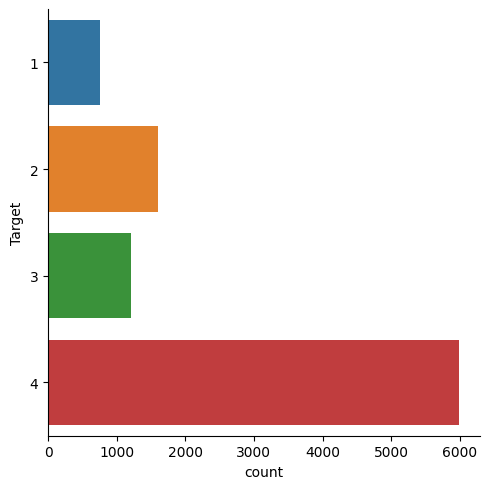

In [8]:
print("Number of target classes:", len(data['Target'].unique()))
print(data['Target'].value_counts())
sb.catplot(y = "Target", data = data, kind = "count")

In [9]:
df = pd.DataFrame(data)
df.isnull().sum().sum()

22140

In [10]:
def calc_na(data):
    data_na = data.isnull().sum().values / data.shape[0] *100
    df_na = pd.DataFrame(data_na, index=df.columns, columns=['Count'])
    df_na = df_na.sort_values(by=['Count'], ascending=False)

    missing_value_count = df_na[df_na['Count']>0].shape[0]

    print(df_na.head(6))
calc_na(df)

               Count
rez_esc    82.954902
v18q1      76.823271
v2a1       71.779847
SQBmeaned   0.052318
meaneduc    0.052318
Id          0.000000


- rez_esc => years behind schooling
- v18q1 => number of tablets houshold owns
- sqbmeaned => mean squared
- v2a1 => monthly rent payment

In [11]:
def repalce_v18q1(x):
    if x['v18q'] == 0:
        return x['v18q']
    else:
        return x['v18q1']

df['v18q1'] = df.apply(lambda x : repalce_v18q1(x),axis=1)
df['v2a1'] = df['v2a1'].fillna(value=df['tipovivi3'])
df['meaneduc'].fillna(0, inplace=True)
df['rez_esc'].fillna(0, inplace=True)
df.isnull().sum().sum()

5

- v18q1 depends on v18q -> number of tablets household owns & owns a tablet
- tipovivi3( =1 rented), v21a(monthly rent payment) => fill na in v21a with 0 if tipovivi3 is 0
- fill na in meaneduc as 0 -> implies 0 years of education
- fill na in rez_esc as 0 -> implies 0 years behind in school

In [12]:
test_df = pd.read_csv('test.csv')

In [13]:
calc_na(df)

                 Count
SQBmeaned     0.052318
Id            0.000000
hogar_mayor   0.000000
parentesco10  0.000000
parentesco11  0.000000
parentesco12  0.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [21]:
df_categorical = df.select_dtypes(include='object')
df_categorical_cols = df_categorical.columns.tolist()
print(df_categorical)

                Id    idhogar dependency edjefe edjefa
0     ID_279628684  21eb7fcc1         no     10     no
1     ID_f29eb3ddd  0e5d7a658          8     12     no
2     ID_68de51c94  2c7317ea8          8     no     11
3     ID_d671db89c  2b58d945f        yes     11     no
4     ID_d56d6f5f5  2b58d945f        yes     11     no
...            ...        ...        ...    ...    ...
9552  ID_d45ae367d  d6c086aa3        .25      9     no
9553  ID_c94744e07  d6c086aa3        .25      9     no
9554  ID_85fc658f8  d6c086aa3        .25      9     no
9555  ID_ced540c61  d6c086aa3        .25      9     no
9556  ID_a38c64491  d6c086aa3        .25      9     no

[9557 rows x 5 columns]


In [22]:
df['edjefe']

0       10
1       12
2       no
3       11
4       11
        ..
9552     9
9553     9
9554     9
9555     9
9556     9
Name: edjefe, Length: 9557, dtype: object

In [23]:
df.drop(columns = ['Id','idhogar'])
cols = ['edjefe', 'edjefa']
df[cols] = df[cols].replace({'no': 0, 'yes':1}).astype(float)
df['edjefe']
calc_na(df)

                 Count
SQBmeaned     0.052318
Id            0.000000
hogar_mayor   0.000000
parentesco10  0.000000
parentesco11  0.000000
parentesco12  0.000000


In [14]:
df1 = df
train_set = df1
train_set['adult'] = train_set['hogar_adul'] - train_set['hogar_mayor']
train_set['dependency_count'] = train_set['hogar_nin'] + train_set['hogar_mayor']
train_set['dependency'] = train_set['dependency_count'] / train_set['adult']
train_set['child_percent'] = train_set['hogar_nin']/train_set['hogar_total']
train_set['elder_percent'] = train_set['hogar_mayor']/train_set['hogar_total']
train_set['adult_percent'] = train_set['hogar_adul']/train_set['hogar_total']

train_set['rent_per_adult'] = train_set['v2a1']/train_set['hogar_adul']
train_set['rent_per_person'] = train_set['v2a1']/train_set['hhsize']
train_set['overcrowding_room_and_bedroom'] = (train_set['hacdor'] + train_set['hacapo'])/2
train_set['no_appliances'] = train_set['refrig'] + train_set['computer'] + train_set['television']
train_set['r4h1_percent_in_male'] = train_set['r4h1'] / train_set['r4h3']
train_set['r4m1_percent_in_female'] = train_set['r4m1'] / train_set['r4m3']
train_set['r4h1_percent_in_total'] = train_set['r4h1'] / train_set['hhsize']
train_set['r4m1_percent_in_total'] = train_set['r4m1'] / train_set['hhsize']
train_set['r4t1_percent_in_total'] = train_set['r4t1'] / train_set['hhsize']
train_set['rent_per_room'] = train_set['v2a1']/train_set['rooms']
train_set['bedroom_per_room'] = train_set['bedrooms']/train_set['rooms']
train_set['elder_per_room'] = train_set['hogar_mayor']/train_set['rooms']
train_set['adults_per_room'] = train_set['adult']/train_set['rooms']
train_set['child_per_room'] = train_set['hogar_nin']/train_set['rooms']
train_set['male_per_room'] = train_set['r4h3']/train_set['rooms']
train_set['female_per_room'] = train_set['r4m3']/train_set['rooms']
train_set['room_per_person_household'] = train_set['hhsize']/train_set['rooms']
train_set['rent_per_bedroom'] = train_set['v2a1']/train_set['bedrooms']
train_set['edler_per_bedroom'] = train_set['hogar_mayor']/train_set['bedrooms']
train_set['adults_per_bedroom'] = train_set['adult']/train_set['bedrooms']
train_set['child_per_bedroom'] = train_set['hogar_nin']/train_set['bedrooms']
train_set['male_per_bedroom'] = train_set['r4h3']/train_set['bedrooms']
train_set['female_per_bedroom'] = train_set['r4m3']/train_set['bedrooms']
train_set['bedrooms_per_person_household'] = train_set['hhsize']/train_set['bedrooms']
train_set['tablet_per_person_household'] = train_set['v18q1']/train_set['hhsize']
train_set['phone_per_person_household'] = train_set['qmobilephone']/train_set['hhsize']
train_set['age_12_19'] = train_set['hogar_nin'] - train_set['r4t1']

train_set['escolari_age'] = train_set['escolari']/train_set['age']

train_set['rez_esc_escolari'] = train_set['rez_esc']/train_set['escolari']
train_set['rez_esc_r4t1'] = train_set['rez_esc']/train_set['r4t1']
train_set['rez_esc_r4t2'] = train_set['rez_esc']/train_set['r4t2']
train_set['rez_esc_r4t3'] = train_set['rez_esc']/train_set['r4t3']
train_set['rez_esc_age'] = train_set['rez_esc']/train_set['age']

train_set.isnull().sum().sum()


7264

Creation of more feature columns 

In [15]:
train_set.drop(columns=['idhogar','Id', 'tamhog', 'agesq', 'hogar_adul', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned'], inplace=True)

Drop useless/unnecessary features

In [16]:
train_set.isnull().sum().sum()

7259

In [17]:
numeric = pd.DataFrame(df[['v2a1','rooms','v18q','v18q1','r4h1','r4h2','r4h3','r4m1','r4m2','r4m3','r4t1','r4t2','r4t3','tamviv','escolari','rez_esc','hhsize','hogar_nin','hogar_mayor','hogar_total','dependency','edjefe','edjefa','meaneduc','bedrooms','overcrowding','qmobilephone','age']])

In [18]:
numeric.info()
print(train_set.corr())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   v2a1          9557 non-null   float64
 1   rooms         9557 non-null   int64  
 2   v18q          9557 non-null   int64  
 3   v18q1         9557 non-null   float64
 4   r4h1          9557 non-null   int64  
 5   r4h2          9557 non-null   int64  
 6   r4h3          9557 non-null   int64  
 7   r4m1          9557 non-null   int64  
 8   r4m2          9557 non-null   int64  
 9   r4m3          9557 non-null   int64  
 10  r4t1          9557 non-null   int64  
 11  r4t2          9557 non-null   int64  
 12  r4t3          9557 non-null   int64  
 13  tamviv        9557 non-null   int64  
 14  escolari      9557 non-null   int64  
 15  rez_esc       9557 non-null   float64
 16  hhsize        9557 non-null   int64  
 17  hogar_nin     9557 non-null   int64  
 18  hogar_mayor   9557 non-null 

/var/folders/43/n044fj2j5w1b2wvl87r80rj80000gn/T/ipykernel_62580/3908197440.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(train_set.corr())


                      v2a1    hacdor     rooms    hacapo      v14a    refrig  \
v2a1              1.000000 -0.025479  0.101634 -0.030867  0.018355  0.061534   
hacdor           -0.025479  1.000000 -0.233369  0.652594 -0.175011 -0.101965   
rooms             0.101634 -0.233369  1.000000 -0.213368  0.129183  0.130531   
hacapo           -0.030867  0.652594 -0.213368  1.000000 -0.150986 -0.124506   
v14a              0.018355 -0.175011  0.129183 -0.150986  1.000000  0.143143   
...                    ...       ...       ...       ...       ...       ...   
rez_esc_escolari -0.016419  0.066803 -0.056761  0.080107 -0.057898 -0.088533   
rez_esc_r4t1     -0.032427  0.030027 -0.027267  0.018484 -0.010347 -0.032757   
rez_esc_r4t2     -0.014930  0.028645 -0.055433  0.033729 -0.020223 -0.051261   
rez_esc_r4t3     -0.014154  0.013776 -0.050953  0.020175 -0.011556 -0.048913   
rez_esc_age      -0.014902  0.054822 -0.051050  0.057767 -0.026029 -0.068894   

                      v18q     v18q1   

In [ ]:
# no need to plot as it is too convoluted 
# too many values
f = plt.figure(figsize=(20, 20))
sb.heatmap(train_set.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [19]:
correlation = train_set.corr()
correlation = correlation['Target'].sort_values(ascending=False)
print(f'The most 20 positive feature: \n{correlation.head(20)}')
print('*'*50)

print(f'The most 20 negative feature: \n{correlation.tail(20)}')

/var/folders/43/n044fj2j5w1b2wvl87r80rj80000gn/T/ipykernel_62580/1703034606.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train_set.corr()


The most 20 positive feature: 
Target                         1.000000
meaneduc                       0.333932
adult_percent                  0.320388
cielorazo                      0.304421
escolari                       0.302305
phone_per_person_household     0.298884
eviv3                          0.294222
epared3                        0.292451
pisomoscer                     0.280284
paredblolad                    0.261274
etecho3                        0.257378
no_appliances                  0.243289
v18q                           0.238864
rooms                          0.226208
instlevel8                     0.214351
tablet_per_person_household    0.206123
v18q1                          0.201754
qmobilephone                   0.199707
computer                       0.183113
lugar1                         0.173359
Name: Target, dtype: float64
**************************************************
The most 20 negative feature: 
eviv1                           -0.208038
r4m1_percent_in_